In [1]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
image_paths = [
    "/content/Farewell_Trek (131).JPG",
    "/content/RamNavami_Mrng (31).JPG",
    "/content/Ugadi_Mrng (16).JPG"
]

In [3]:
to_tensor = transforms.ToTensor()

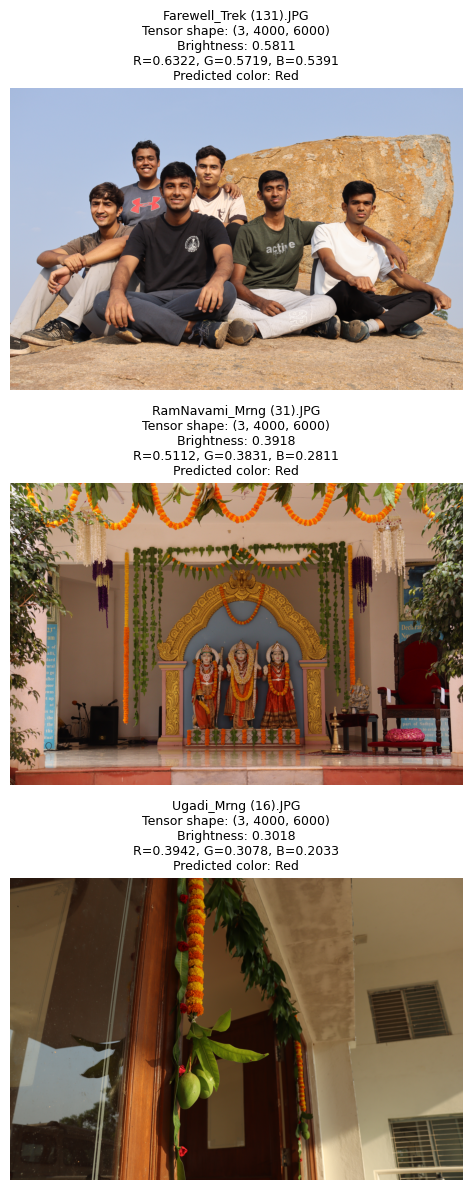

In [4]:
fig, axes = plt.subplots(len(image_paths), 1, figsize=(6, 12))

for i, path in enumerate(image_paths):
    # Load and convert to tensor
    img = Image.open(path).convert("RGB")
    tensor_img = to_tensor(img)

    # Brightness
    brightness = tensor_img.mean().item()

    # Channel means
    r_mean = tensor_img[0].mean().item()
    g_mean = tensor_img[1].mean().item()
    b_mean = tensor_img[2].mean().item()

    # Identify dominant channel
    means = [r_mean, g_mean, b_mean]
    dominant_idx = means.index(max(means))
    color_map = {0: "Red", 1: "Green", 2: "Blue"}
    predicted_color = color_map[dominant_idx]

    # Display in subplot
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(
        f"{path.split('/')[-1]}\n"
        f"Tensor shape: {tuple(tensor_img.shape)}\n"
        f"Brightness: {brightness:.4f}\n"
        f"R={r_mean:.4f}, G={g_mean:.4f}, B={b_mean:.4f}\n"
        f"Predicted color: {predicted_color}",
        fontsize=9
    )

plt.tight_layout()
plt.show()